In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import models, layers
import logging

In [2]:
tf.get_logger().setLevel(logging.ERROR)

In [3]:
EPOCHS = 100
BATCH_SIZE = 16
TRAIN_TEST_SPLIT = 0.8
MIN = 12
FILE_NAME = "../data/book_store_sales.csv"

In [4]:
def readfile(file_name):
    file = open(file_name, 'r', encoding='UTF-8')
    next(file)
    data = []
    for line in (file):
        values = line.split(',')
        data.append(float(values[1]))
    file.close()
    return np.array(data, dtype=np.float32)

In [6]:
sales = readfile("data/book_store_sales.csv")
months = len(sales)
split = int(months * TRAIN_TEST_SPLIT)
train_sales = sales[:split]
test_sales = sales[split:]

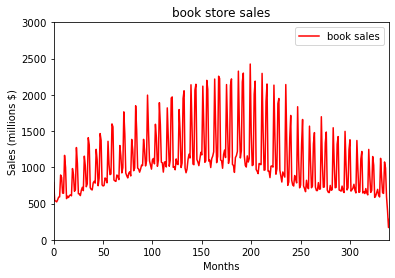

In [8]:
x = range(months)
plt.plot(x, sales, 'r-', label='book sales')
plt.title("book store sales")
plt.axis([0, 339, 0.0, 3000.])
plt.xlabel('Months')
plt.ylabel('Sales (millions $)')
plt.legend()
plt.show()

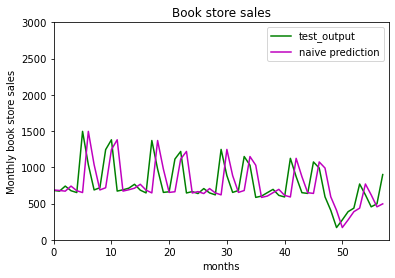

In [9]:
# plot naive prediction
test_output = test_sales[MIN:]
naive_prediction = test_sales[MIN - 1:-1]
x = range(len(test_output))
plt.plot(x, test_output, 'g-', label='test_output')
plt.plot(x, naive_prediction, 'm-', label='naive prediction')
plt.title('Book store sales')
plt.axis([0, len(test_output), 0.0, 3000.0])
plt.xlabel('months')
plt.ylabel('Monthly book store sales')
plt.legend()
plt.show()

In [10]:
mean = np.mean(train_sales)
stddev = np.std(train_sales)
train_sales_std = (train_sales - mean) / stddev
test_sales_std = (test_sales - mean) / stddev

In [11]:
train_months = len(train_sales)
train_X = np.zeros((train_months - MIN, train_months - 1, 1))
train_y = np.zeros((train_months - MIN, 1))
for i in range(0, train_months - MIN):
    train_X[i, -(i + MIN):, 0] = train_sales_std[0:i + MIN]  # 这样设计，可以保证末尾是有效值，前面都填充的0
    train_y[i, 0] = train_sales_std[i + MIN]

In [12]:
test_months = len(test_sales)
test_X = np.zeros((test_months - MIN, test_months - 1, 1))
test_y = np.zeros((test_months - MIN, 1))
for i in range(0, test_months - MIN):
    test_X[i, -(i + MIN):, 0] = test_sales_std[0:i + MIN]
    test_y[i, 0] = test_sales_std[i + MIN]

In [14]:
print(train_X[0])

[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.     

In [15]:
model = models.Sequential()
model.add(layers.SimpleRNN(128,
                           activation='relu',
                           input_shape=(None, 1)  # None 表示 timesteps 不固定，每个 timestep 只有 1 个值
                           ))
model.add(layers.Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 128)               16640     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(train_X, train_y,
                    validation_data=(test_X, test_y),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=2,
                    shuffle=True)

Epoch 1/100
17/17 - 7s - loss: 0.8164 - mean_absolute_error: 0.6549 - val_loss: 0.5898 - val_mean_absolute_error: 0.6990
Epoch 2/100
17/17 - 5s - loss: 0.5398 - mean_absolute_error: 0.5438 - val_loss: 0.3614 - val_mean_absolute_error: 0.5092
Epoch 3/100
17/17 - 5s - loss: 0.3319 - mean_absolute_error: 0.4402 - val_loss: 0.2613 - val_mean_absolute_error: 0.3895
Epoch 4/100
17/17 - 5s - loss: 0.1454 - mean_absolute_error: 0.2816 - val_loss: 0.1233 - val_mean_absolute_error: 0.2537
Epoch 5/100
17/17 - 5s - loss: 0.0900 - mean_absolute_error: 0.2162 - val_loss: 0.0890 - val_mean_absolute_error: 0.2034
Epoch 6/100
17/17 - 5s - loss: 0.0787 - mean_absolute_error: 0.1946 - val_loss: 0.0826 - val_mean_absolute_error: 0.1858
Epoch 7/100
17/17 - 5s - loss: 0.0559 - mean_absolute_error: 0.1702 - val_loss: 0.0668 - val_mean_absolute_error: 0.1736
Epoch 8/100
17/17 - 5s - loss: 0.0459 - mean_absolute_error: 0.1571 - val_loss: 0.0670 - val_mean_absolute_error: 0.1740
Epoch 9/100
17/17 - 5s - loss: 0

In [ ]:
train_X = train_X[:, (train_months - 13):, :]
test_X = test_X[:, (test_months - 13):, :]
